In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, normalize
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV, LogisticRegression 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import log_loss, mean_squared_error, make_scorer, accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.base import clone
from scipy.special import logit, expit
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from pandas_profiling import ProfileReport
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, StackingRegressor
palette = sns.set_palette(sns.color_palette("colorblind"))
# sns.set(font_scale=3)
sns.set_style('white')


In [112]:
# orig_data2 = pd.read_csv('data/cell2celltrain.csv').dropna()
# cell2celldf = orig_data2.copy()
# cell2celldf.info()

In [124]:
orig_data = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
dfst = orig_data.copy()
dfst['Total Charges'] = dfst['total day charge'] + dfst['total eve charge'] + dfst['total intl charge']
dfst['Churn'] = np.where(dfst['churn']== True, 'Churn', 'Retained')
dfst.head()
df.info()
# dfst.head()
# dfstc = dfst[dfst['Churn']== 'Churn']
# dfstc.head()
# print(dfstc['total intl charge'].median())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49986 entries, 0 to 51043
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    49986 non-null  object 
 1   MonthlyRevenue           49986 non-null  float64
 2   MonthlyMinutes           49986 non-null  float64
 3   TotalRecurringCharge     49986 non-null  float64
 4   OverageMinutes           49986 non-null  float64
 5   CustomerCareCalls        49986 non-null  float64
 6   MonthsInService          49986 non-null  int64  
 7   AgeHH1                   49986 non-null  float64
 8   AgeHH2                   49986 non-null  float64
 9   RetentionCalls           49986 non-null  int64  
 10  RetentionOffersAccepted  49986 non-null  int64  
 11  MadeCallToRetentionTeam  49986 non-null  object 
 12  Churn Status             49986 non-null  object 
dtypes: float64(7), int64(3), object(3)
memory usage: 6.6+ MB


In [126]:
dfst_int = dfst[dfst['international plan'] == "yes"]
dfst_int.head()
dfst_intn = dfst[dfst['international plan'] == "no"]

print(dfst_intn['Total Charges'].median())
print(dfst_intn['total intl charge'].median())

print(dfst_int['Total Charges'].median()) 
print(dfst_int['total intl charge'].median())

print(dfst_intn['Total Charges'].mean())
print(dfst_intn['total intl charge'].mean())

print(dfst_int['Total Charges'].mean()) 
print(dfst_int['total intl charge'].mean())
dfst.info()

50.324999999999996
2.75
52.02
2.92
50.22233887043189
2.7532790697674416
52.16321981424148
2.8699071207430342
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null

In [103]:
orig_data2 = pd.read_csv('data/cell2celltrain.csv', usecols = ['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'CustomerCareCalls', 'MonthsInService', 'MadeCallToRetentionTeam', 'RetentionCalls', 'RetentionOffersAccepted', 'AgeHH1', 'AgeHH2']).dropna()
df = orig_data2.copy()
df['Churn Status'] = np.where(df['Churn']== 'Yes', 'Churn', 'Retained')
dfc = df[df['Churn']== 'Yes']
dfc['churn'] = np.where(dfc['Churn']== 'Yes', True, False)
dfc['Churn Status'] = np.where(dfc['churn']== True, 'Churn', 'Retained')
dfc.head()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49986 entries, 0 to 51043
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    49986 non-null  object 
 1   MonthlyRevenue           49986 non-null  float64
 2   MonthlyMinutes           49986 non-null  float64
 3   TotalRecurringCharge     49986 non-null  float64
 4   OverageMinutes           49986 non-null  float64
 5   CustomerCareCalls        49986 non-null  float64
 6   MonthsInService          49986 non-null  int64  
 7   AgeHH1                   49986 non-null  float64
 8   AgeHH2                   49986 non-null  float64
 9   RetentionCalls           49986 non-null  int64  
 10  RetentionOffersAccepted  49986 non-null  int64  
 11  MadeCallToRetentionTeam  49986 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 5.0+ MB


<ipython-input-103-cd195530aab3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['churn'] = np.where(dfc['Churn']== 'Yes', True, False)
<ipython-input-103-cd195530aab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Churn Status'] = np.where(dfc['churn']== True, 'Churn', 'Retained')


,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,CustomerCareCalls,MonthsInService,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,MadeCallToRetentionTeam,Churn Status
0,Yes,24.00,219.0,22.0,0.0,0.0,61,62.0,0.0,1,0,Yes,Churn
1,Yes,16.99,10.0,17.0,0.0,0.0,58,40.0,42.0,0,0,No,Churn
2,No,38.00,8.0,38.0,0.0,0.0,60,26.0,26.0,0,0,No,Retained
3,No,82.28,1312.0,75.0,0.0,4.3,59,30.0,0.0,0,0,No,Retained
4,Yes,17.14,0.0,17.0,0.0,0.0,53,46.0,54.0,0,0,No,Churn


In [45]:
#Customers who received Retention Calls
df_ret = df[df['RetentionCalls'] > 0]
df_ret['Successful Retention'] = np.where(df_ret['RetentionOffersAccepted']>0, 'Yes', 'No')
df_ret['RetentionOffersAccepted'].value_counts()
# df_ret['RetentionCalls'].value_counts()


<ipython-input-45-aac2d6b6c497>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ret['Successful Retention'] = np.where(df_ret['RetentionOffersAccepted']>0, 'Yes', 'No')


0    839
1    822
2     36
3      8
Name: RetentionOffersAccepted, dtype: int64

### Total retention calls (value count) : 
1    1572
2     118
3      13
4       2
1708 calls 
### Retention Offers Accepted
0    839
1    822
2     36
3      8
839 declined vs 866

[Text(0.5, 0, 'Offers Accepted'), Text(0, 0.5, 'Retention Attempts')]

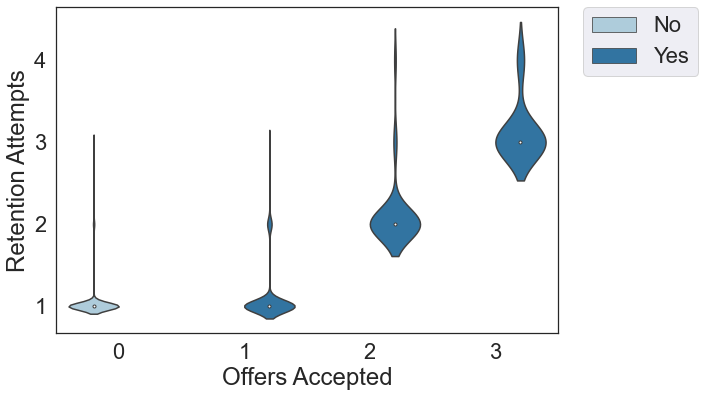

In [82]:
fig, ax = plt.subplots(figsize = (9,6))
sns.violinplot(data=df_ret, x="RetentionOffersAccepted", y="RetentionCalls", hue="Successful Retention", scale = "width", palette = 'Paired')
sns.set(font_scale=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Offers Accepted', ylabel='Retention Attempts')
# plt.xlabel = 'Offers Accepted'
# plt.ylabel = 'Retention Attempts'

In [83]:
# sns.boxplot(data=df_ret, x="RetentionOffersAccepted", y="RetentionCalls", hue="Successful Retention")

In [109]:
# plt.bar(dfc['MonthlyRevenue'].agg('median'))
# # plt.bar(dfstc['Total Charges'].agg('median'))
# sns.boxplot(x=dfc['MonthlyRevenue'])
# sns.boxplot(x=dfstc['Total Charges'])
# y= df['MonthlyRevenue']
# fig, ax = plt.subplots(figsize = (12,10))
# sns.boxplot(data=df, y=y )

In [27]:
df_ch = df[df['Churn'] == 'Yes']
df_ch['Overages'] =df_ch['MonthlyRevenue'] - df_ch['TotalRecurringCharge'] 
df_ch

<ipython-input-27-db4e12dca2fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch['Overages'] =df_ch['MonthlyRevenue'] - df_ch['TotalRecurringCharge']


,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,CustomerCareCalls,MonthsInService,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,MadeCallToRetentionTeam,Overages
0,Yes,24.00,219.0,22.0,0.0,0.0,61,62.0,0.0,1,0,Yes,2.00
1,Yes,16.99,10.0,17.0,0.0,0.0,58,40.0,42.0,0,0,No,-0.01
4,Yes,17.14,0.0,17.0,0.0,0.0,53,46.0,54.0,0,0,No,0.14
15,Yes,172.44,1978.0,100.0,362.0,0.3,58,48.0,32.0,1,0,Yes,72.44
18,Yes,24.49,42.0,17.0,10.0,0.0,58,36.0,0.0,0,0,No,7.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51019,Yes,57.67,535.0,45.0,64.0,1.0,33,28.0,22.0,0,0,No,12.67
51029,Yes,30.24,63.0,30.0,0.0,0.0,32,0.0,0.0,0,0,No,0.24
51031,Yes,33.63,28.0,30.0,0.0,0.0,33,0.0,0.0,0,0,No,3.63
51033,Yes,38.34,320.0,30.0,21.0,1.3,35,36.0,34.0,0,0,No,8.34


In [29]:
print(df_ch['MonthlyRevenue'].median())
print(df_ch['MonthlyRevenue'].mean())
print(df_ch['TotalRecurringCharge'].median())
print(df_ch['TotalRecurringCharge'].mean())
print(df_ch['Overages'].median())
print(df_ch['Overages'].mean())

47.49
57.8025510629429
43.0
44.448033903015144
2.6199999999999997
13.354517159927747


Median of cell phone plan for customers who left was $47.49

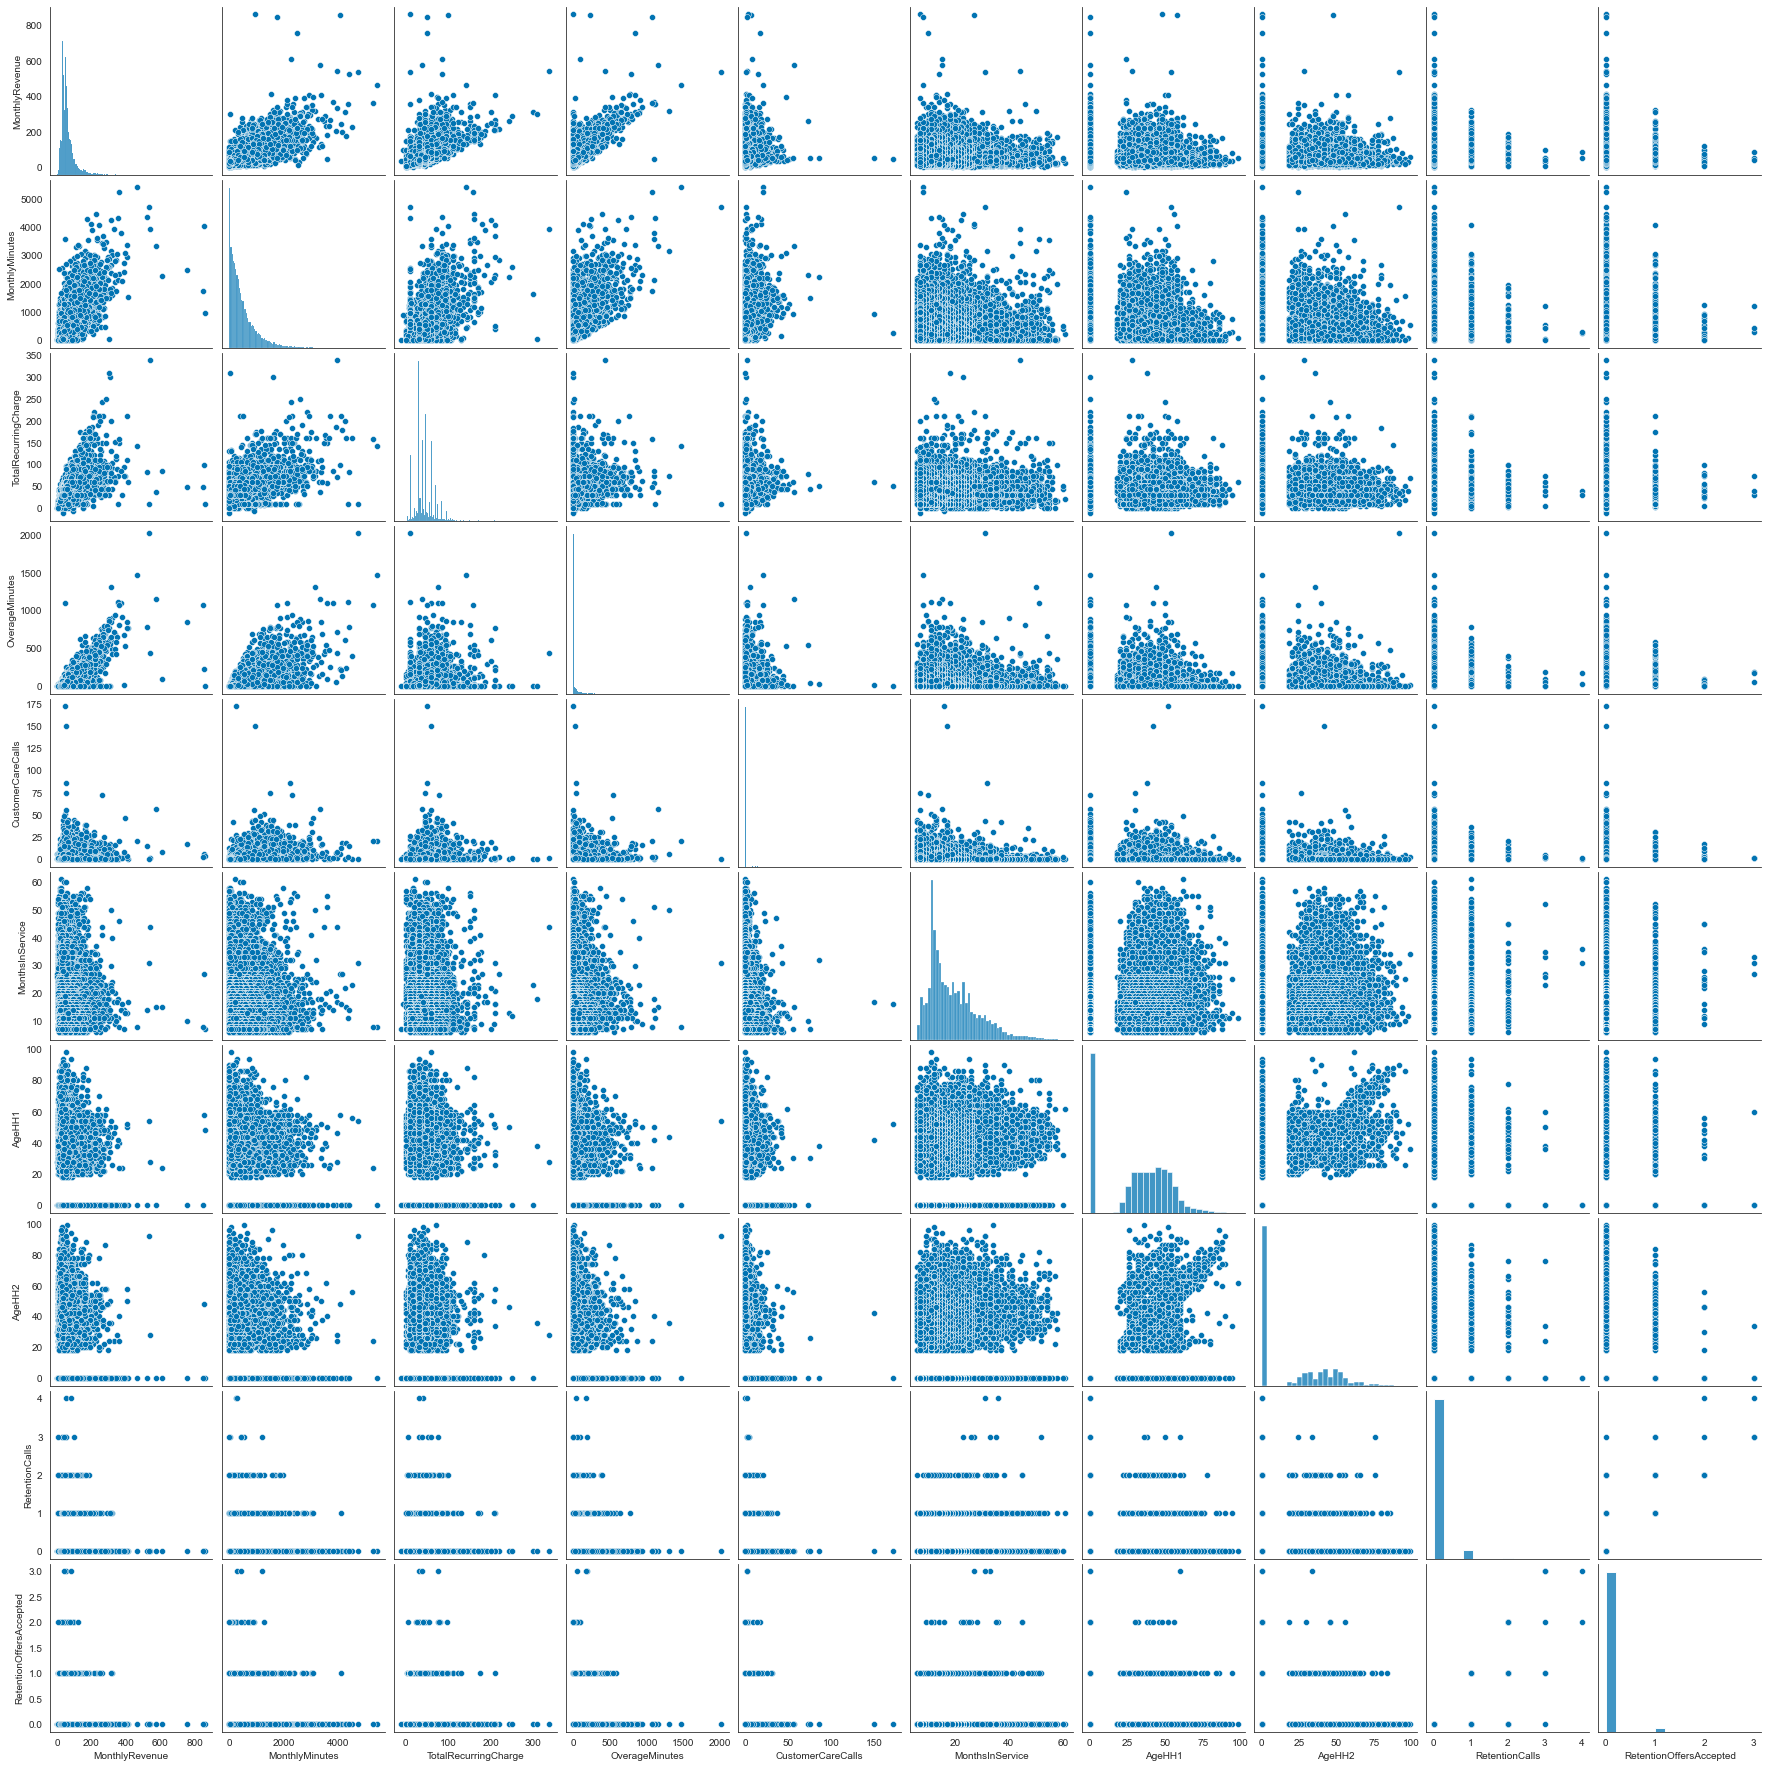

In [25]:
sns.pairplot(df_ch)